**K-NN kodlamaya başlamadan önce, tarayıcımıza "sklearn knn" yazarak ilk çıkan 3 veya 4 sekmeyi açarak, çıkan belgeleri okumamızda fayda var.**

In [1]:
#1.kutuphaneler

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#veri yukleme

veriler = pd.read_csv('veriler/veriler.csv')
x = veriler.iloc[:,1:4].values # Bağımsız değişkenler, boy, kilo ve yaş
y = veriler.iloc[:,4:].values # bağmlı değişken, cinsiyet

In [2]:
veriler

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [3]:
# verilerin eğitim ve test için bölünmesi

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [4]:
x_train

array([[177,  60,  22],
       [190,  80,  25],
       [193,  90,  23],
       [129,  38,  12],
       [135,  34,  10],
       [180,  90,  30],
       [187,  80,  27],
       [185, 105,  33],
       [175,  90,  35],
       [183,  88,  28],
       [133,  30,   9],
       [130,  30,  10],
       [174,  70,  47],
       [160,  58,  39]], dtype=int64)

In [3]:
# verilerin ölçeklenmesi

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(x_train) 
X_test = sc.transform(x_test) 

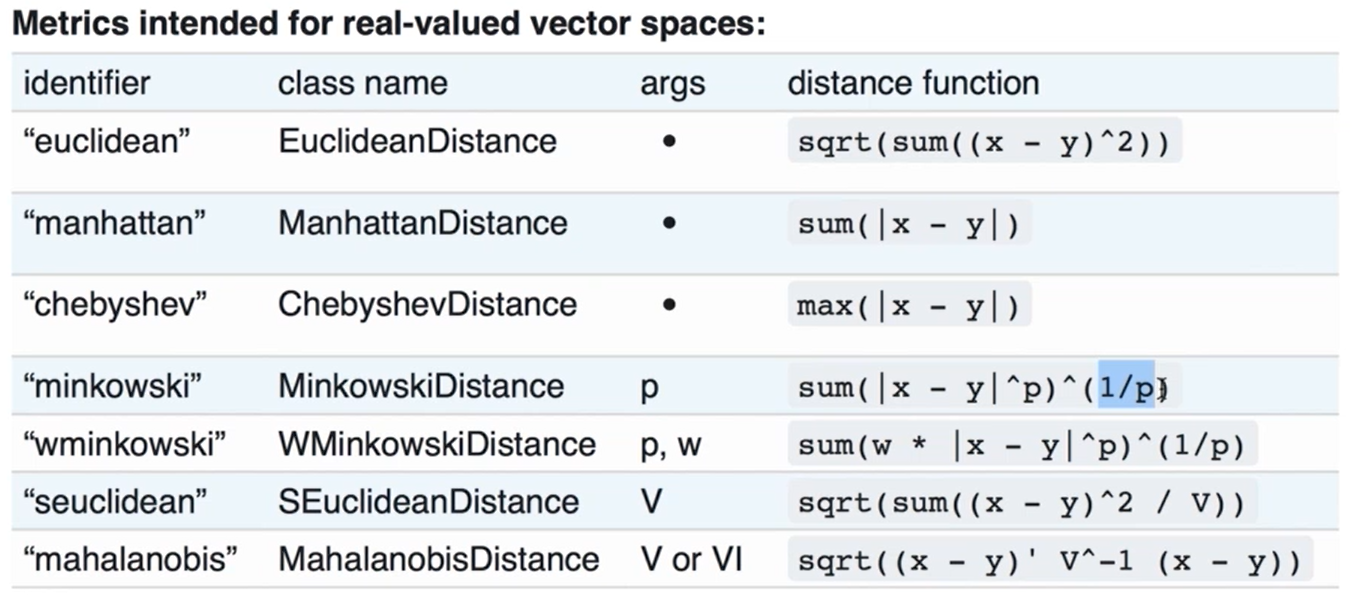

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski") # "n_neighbors=5" sorgular için varsayılan olarak kullanılacak komşu sayısı .
knn.fit(X_train,y_train) # öğren

y_pred = knn.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [5]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[0, 1],
       [6, 1]], dtype=int64)

**şimdi burada "n_neighbors" parametresini düşüreceim, normalde komşu sayısını ne kadar artırırsak o kadar doğru öğrenir ama burada yani bizim veri kümemizde küçük olan değerlerde var bunlarıda düşünürsek, "n_neighbors" parametresini düşürmemiz yararımıza olacaktır.**

In [6]:
knn = KNeighborsClassifier(n_neighbors=1, metric="minkowski") 
knn.fit(X_train,y_train) 

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([[1, 0],
       [1, 6]], dtype=int64)

**örnek veri kümemize bağlı olarak, metotlar ve parametreler değişiyor, bunları veri gördükçe, uygulama yaptıkça öğreneceğim.**